In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def ff(x, a, b):
    '''функция задает начальное положение'''
    
    return np.sin(2*np.pi * x / (b-a))

def ff_(nx):
    '''функция задает начальную скорость'''
    
    return np.zeros(nx)


def fff(f, omega=0.01, a=0, b=1, nx=1000, T=1, nt=100):
    '''функция делает работу'''
    
    ht = T/nt
    hx = (b-a)/nx
    
    net_x = np.linspace(a, b, nx)
    net_t = np.linspace(0, T, nt)
    
    theta = omega**2 * ht / hx
    
    #начальные условия
    y = np.zeros([nt, nx])
    y[0,:] = f(net_x, a, b)
    
    y0 = ff_(nx)
    
    #задаем значение функции в следующий после нулевого момент времени, потому что надо, мы его посчитали на листочке
    for n in range(1, nx-1):
        y[1,n] = y[0,n] + theta**2/2 * (y[0,n+1] - 2*y[0,n] + y[0,n-1]) - ht*y0[n]
        
    y[1,0] = 0
    y[1,-1] = 0
    
    for t in range(1,nt-1):
        for n in range(1, nx-2):
            y[t+1, n] = 2*y[t, n] - y[t-1, n] + theta*(y[t, n+1] - 2*y[t, n] + y[t, n-1])
            y[t+1,0] = 0
            y[t+1,-1] = 0
                
    return y

ValueError: num must be 1 <= num <= 12, not 13

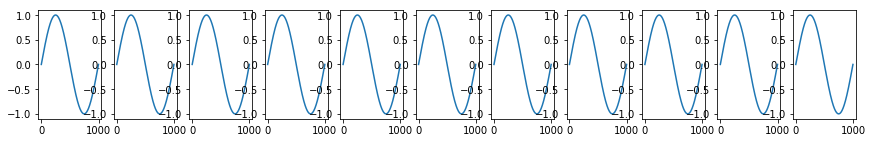

<Figure size 1152x144 with 0 Axes>

In [31]:
y = fff(ff)
net_x = np.linspace(0, 1, 1000)
z = ff(net_x, 0, 1)

fig = plt.figure(figsize=plt.figaspect(0.1))
for i in range(1,12):
    ax = fig.add_subplot(1, 12, i)
    ax.plot(y[4*i,:])
fig = plt.figure(figsize=plt.figaspect(0.1))
for i in range(13,25):
    ax = fig.add_subplot(1, 12, i)
    ax.plot(y[4*i,:])